---
title: "A First Application: Iris Flower Classification"
author: Daniel Redel
date: today
format:
  html:
    toc: true
    code-fold: false
    html-math-method: katex
jupyter: python3
---

# The Iris Flower Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In this section, we will go through a simple machine learning application and create our first model. In the process, we will introduce some core concepts and terms. Let’s assume we are interested in **distinguishing the species of some iris flowers** and we have collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals.

We also have the measurements of some irises that have been previously identified by an expert botanist as belonging to the species **setosa**, **versicolor**, or **virginica**. For these measurements, we can be certain of which species each iris belongs to.

Our training data is a well-known dataset in statistics and machine learning, namely, Iris dataset, that was collected by one of the most famous biologist statistician of 20th century, Sir Ronald Fisher. This dataset is already part of `scikit-learn` and can be accessed by importing its datasets module as follows:

In [36]:
from sklearn import datasets # sklearn is the Python name of →scikit-learn
iris = datasets.load_iris()
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Datasets that are part of scikit-learn are generally stored as `Bunch` objects; that is, an object of class `sklearn.utils.Bunch`. This is an object that contains the actual data as well as some information about it. Here we will work with `DataFrame` objects, so let's just convert this into a `DataFrame` object:

In [37]:
#| label: tbl-raw-dataset
#| tbl-cap: Iris Dataset

df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add target
df['target'] = iris.target

# Dictionary
target_names_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Add the target names column to the DataFrame
df['target_names'] = df['target'].map(target_names_dict)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris, contained in the `target` variable. Because we have measurements for which we know the correct species of iris, this is a **supervised learning problem**. 

In this problem, we want to predict one of several options (the species of iris). This is an example of a **classification problem**. The possible outputs (different species of irises) are called classes. Every iris in the dataset belongs to one of three classes, so this problem is a three-class classification problem:

In [33]:
print('Classes in iris dataset:', iris['target_names'])

Classes in iris dataset: ['setosa' 'versicolor' 'virginica']


# Measuring Success: Training and Test Data

We want to build a machine learning model from this data that can predict the species of iris _for a new set of measurements_. Recall that the entire practical utility of the trained model is summarized in its metrics of performance. To answer this question, there are various evaluation rules we will discuss later. For now, perhaps the most intuitive estimator is to evaluate a trained model on a test data, also known as test set. 

Since here we only have one dataset, we need to simulate the effect of having test set. In this regard, we randomly split the given data into a **training set** (used to train the model) and a **test set**, which is used for evaluation.

## Features Set and Target Set

Before splitting our data, we need to isolate our `target` outcome with the **input space** or set of _covariates_:

In [ ]:
X = df.drop(columns=["target", "target_names"]) # Covariates-Only
y = df["target"] # Target-Outcome

## Splitting our Data

Now, in order to split the data, we can use `train_test_split` function from the `sklearn.model_selectionmodule`. This function _randomly_ extracts (by default) 75% of the rows in the data as the training set. The remaining 25% of the data is declared as the test set. 
- We can change the size of the test set by specifying it with `test_size=`.
- It is also good practice to keep the proportion of classes in both the training and the test sets as in the whole data. This is done by setting the `stratify` to variable representing the target.
- To make sure that we will get the same output if we run the same function several times, we provide a fixed seed using the `random_state` parameter.

Here, we use stratified random split to divide the given data into 80% training and 20% test:

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

# Show Results
print('X Train shape', X_train.shape)
print('X Test shape', X_test.shape)
print('y Train shape', y_train.shape)
print('y Test shape', y_test.shape)
print('Count of classes in y Train', np.bincount(y_train))
print('Count of classes in y Test', np.bincount(y_test))

X Train shape (120, 4)
X Test shape (30, 4)
y Train shape (120,)
y Test shape (30,)
Count of classes in y Train [40 40 40]
Count of classes in y Test [10 10 10]


The `bincount` function shows that the equal proportion of classes in the given data is kept in both the training and the test sets.

### Data Visualization

For datasets in which the number of variables is not really large, visualization could be a good exploratory analysis —it could reveal possible abnormalities or could provide us with an insight into the hypothesis behind the entire experiment.

In [43]:
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=iris.feature_names)
y_train_df = pd.DataFrame(y_train, columns=['target'])
train_df = pd.concat([X_train_df, y_train_df], axis=1)

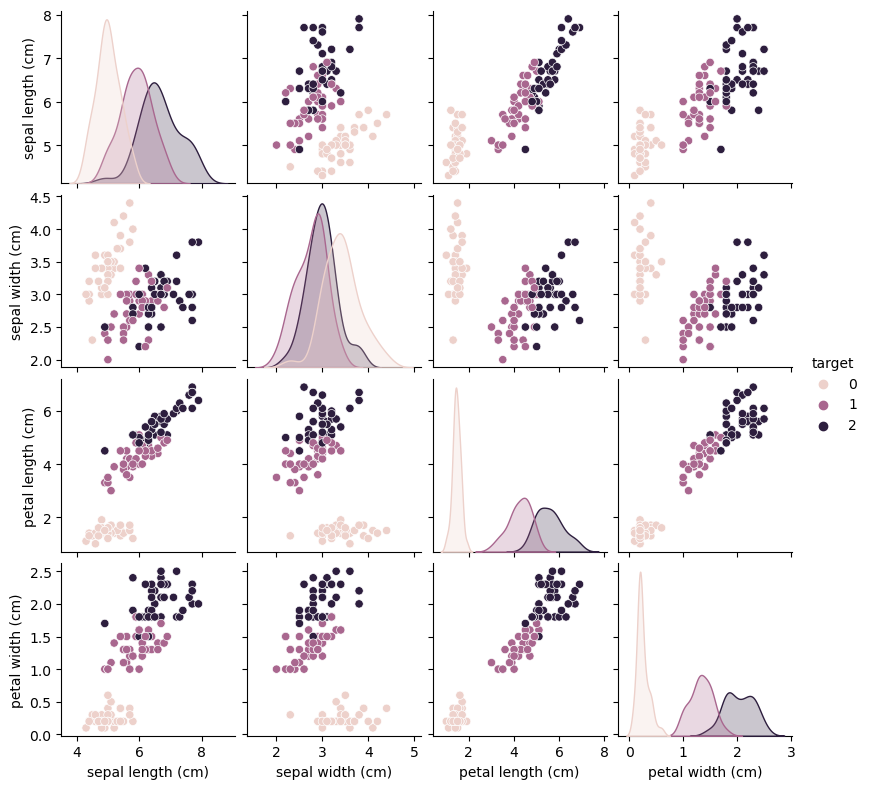

In [44]:
#| label: fig-pairplot
#| fig-cap: Pair plot of Iris dataset, by class label

import seaborn as sns
sns.pairplot(train_df, hue='target', height=2) 

From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.

## Data Normalization

 It is common that the values of features in a dataset come in different scales. In these cases, it is common to apply some type of feature scaling (`normalization`) to the training data **to make the scale of features “comparable”**. Important classes of machine learning models such as `neural networks`, `kNNs`, `ridge regression`, to just name a few, benefit from feature scaling.

`scikit-learn` has already transformers for implementing both standardization and min-max scaling. These are `StandardScaler` (for standardization) and `MinMaxScaler` (for min-max scaling) classes from `sklearn.preprocessing` module. 

Here we use `StandardScaler` to perform the standardization:

In [45]:
#| label: tbl-train-norm
#| tbl-cap: X Train Dataset, Normalized

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # This FITS and, after that, TRANSFORMS --- we can actually do it separately
#X_test = scaler.transform(X_train)  # If we only fit before, we transform now the train
X_test = scaler.transform(X_test)  # Use the same scaler as on the training data

pd.DataFrame(X_train).head(3)

,0,1,2,3
0,-1.242019,-0.110448,-1.324779,-1.188339
1,-1.124570,-0.110448,-1.324779,-1.319285
2,-1.711813,-0.110448,-1.380934,-1.319285


It is important to note that the `test set` should not be used in any stage involved in training of our classifier, not even in a preprocessing stage such as normalization. The main reason for this will be explained in future sections.  

In this regard, a **common mistake is to apply normalization before splitting** the entire data into training and test sets. **This causes data leakage**; that is, some information about the test set leak into the training process. 

# Model Training

Now we can start building the actual machine learning model. There are many classification algorithms in `scikit-learn` that we could use. Here we will use a **k-nearest neighbors classifier**, which is easy to understand.

> One can think that the **kNN classifier** grows a spherical region centered at the test point until it encloses `k` training samples, and classifies the test point to the majority class among these `k` training samples.

All machine learning models in `scikit-learn` are implemented in their own `Estimator` classes: 
- The k-nearest neighbors classification algorithm is implemented in the `KNeighborsClassifier` class in the neighbors module. 

Before we can use the model, we need to **instantiate the class into an object** (`knn`). This is when we will **set any parameters of the model**. 
- The most important parameter of `KNeighborsClassifier` is the number of neighbors, which we will set to `n_neighbors=3`:

In [47]:
from sklearn.neighbors import KNeighborsClassifier as kNN

# Instantiate Class into Object. Set Parameters
knn = kNN(n_neighbors=3)

To train the model, we call the `fit()` method of the `knn` object. Because this is an estimator used for supervised learning, its `fit()` method expects both the feature matrix and the targets:

In [48]:
# Train Model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Making Predictions

We can now make predictions using this model on new data for which we might not know the correct labels.  To make a prediction, we call the `predict()` method of the `knn` object:

In [50]:
# Predict
y_test_pred = knn.predict(X_test)

print('knn predicts: ' + str(iris.target_names[y_test_pred]))

knn predicts: ['setosa' 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa']


# Evaluating the Model

There are various rules and metrics to assess the performance of a classifier. Here we use the simplest ones: (1) **Accuracy** and (2) **Error Rate**. 
1. **Accuracy** is the _proportion of correctly classified points in a test set_.
2. The **Error Rate** is the _proportion of misclassified points in a test set_. 

In [64]:
# Accuracy:
print( "Accuracy Score on Test:", np.mean(y_test_pred == y_test).round(2) )
 # Error Rate:
print( "Error Rate on Test:", np.mean(y_test_pred != y_test).round(2) )

Accuracy Score on Test: 0.97
Error Rate on Test: 0.03


Actually, using `scikit-learn` built-in functions from `metrics` module many performance metrics can be easily calculated. For this purpose, there are two options: 
1. **`.accuracy_score` function**: expects the actual labels `y_test` and predicted labels `y_test_pred` as arguments
2. **`.score` method**: fits the `knn` model and returns the classifier accuracy **in one-go**. It needs `X_test` and `y_test`.

In [73]:
from sklearn.metrics import accuracy_score
 
# Accuracy_score
print( "Using .accuracy_score", accuracy_score(y_test_pred, y_test).round(2) ) # y_pred vs y_test
# .score
print( "Using .score", knn.score(X_test, y_test).round(2) )      # X_test and y_test

Using .accuracy_score 0.97
Using .score 0.97


For this model, the test set accuracy is about $0.97$, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises. This high level of accuracy means that our model may be trustworthy enough to use. 